In [1]:
from tensorflow import keras
import numpy as np
import os
from utils import split_train,load_images_with_labels
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
from tensorflow.keras.utils import plot_model

In [28]:
#Loading the images

TRAIN_IMAGE_PATH=os.path.join(os.curdir,"processed data","train_images.npy")
TRAIN_LABELS_PATH=os.path.join(os.curdir,"processed data","train_labels.npy")
TEST_IMAGE_PATH=os.path.join(os.curdir,"processed data","test_images.npy")

X_train_full,Y_full,X_test=load_images_with_labels(TRAIN_IMAGE_PATH,TRAIN_LABELS_PATH,TEST_IMAGE_PATH)
X_train,X_valid,y_train,y_valid=split_train(X_train_full,Y_full,validation_size=0.2)

In [2]:
#Base architecture

"""
The architecture of our model is:

2 Conv2D layer (filter=32, kernel_size=(5,5), activation=”relu”)

MaxPool2D layer ( pool_size=(2,2))

Dropout layer (rate=0.25)

2 Conv2D layer (filter=64, kernel_size=(3,3), activation=”relu”)

MaxPool2D layer ( pool_size=(2,2))

Dropout layer (rate=0.25)

Flatten layer to squeeze the layers into 1 dimension

Dense Fully connected layer (256 nodes, activation=”relu”)

Dropout layer (rate=0.5)

Dense layer (43 nodes, activation=”softmax”)

--------------------------------------------------------------------------------------------------------------

We got a training set accuracy of 95% , validation set accuracy of 98% and test set accuracy of 94.7% using this model 

It is clear that our model is underfitting and we need to increase the number of layers in our model (make it deeper)

"""

'\nThe architecture of our model is:\n\n2 Conv2D layer (filter=32, kernel_size=(5,5), activation=”relu”)\n\nMaxPool2D layer ( pool_size=(2,2))\n\nDropout layer (rate=0.25)\n\n2 Conv2D layer (filter=64, kernel_size=(3,3), activation=”relu”)\n\nMaxPool2D layer ( pool_size=(2,2))\n\nDropout layer (rate=0.25)\n\nFlatten layer to squeeze the layers into 1 dimension\n\nDense Fully connected layer (256 nodes, activation=”relu”)\n\nDropout layer (rate=0.5)\n\nDense layer (43 nodes, activation=”softmax”)\n\n--------------------------------------------------------------------------------------------------------------\n\nWe got a training set accuracy of 95% , validation set accuracy of 98% and test set accuracy of 94.7% using this model \n\nIt is clear that our model is underfitting and we need to increase the number of layers in our model (make it deeper)\n\n'

In [2]:
#Experimenting with the model architecture

def make_model_sequential()->keras.models.Model:
    
    model=keras.models.Sequential([
        keras.layers.Input(shape=[30,30,3]),
        keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"),
        keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding="same"),
        keras.layers.MaxPool2D(pool_size=(2,2)),
        keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"),
        keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"),
        keras.layers.MaxPool2D(pool_size=(2,2)),
        keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu",padding="same"),
        keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu",padding="same"),
        keras.layers.MaxPool2D(pool_size=(2,2)),
        keras.layers.Flatten(),
        keras.layers.Dense(units=256,activation="relu",kernel_initializer="he_normal"),
        keras.layers.Dense(units=256,activation="relu",kernel_initializer="he_normal"),
        keras.layers.Dropout(rate=0.3),
        keras.layers.Dense(units=43,activation="softmax")
    ])
    
    return model

In [3]:
model=make_model_sequential()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 128)         7

In [4]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [39]:
keras.backend.clear_session()
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_valid,y_valid),batch_size=64)

Epoch 1/10
491/491 [==============================] - 81s 164ms/step - loss: 1.3369 - accuracy: 0.6417 - val_loss: 0.1992 - val_accuracy: 0.9368
Epoch 2/10
491/491 [==============================] - 83s 168ms/step - loss: 0.1706 - accuracy: 0.9521 - val_loss: 0.2010 - val_accuracy: 0.9473
Epoch 3/10
491/491 [==============================] - 85s 172ms/step - loss: 0.1138 - accuracy: 0.9698 - val_loss: 0.0518 - val_accuracy: 0.9860
Epoch 4/10
491/491 [==============================] - 85s 173ms/step - loss: 0.0725 - accuracy: 0.9804 - val_loss: 0.0790 - val_accuracy: 0.9777
Epoch 5/10
491/491 [==============================] - 84s 170ms/step - loss: 0.0748 - accuracy: 0.9810 - val_loss: 0.0682 - val_accuracy: 0.9833
Epoch 6/10
491/491 [==============================] - 84s 170ms/step - loss: 0.0914 - accuracy: 0.9770 - val_loss: 0.0614 - val_accuracy: 0.9850
Epoch 7/10
491/491 [==============================] - 84s 170ms/step - loss: 0.0396 - accuracy: 0.9901 - val_loss: 0.0367 - val_ac

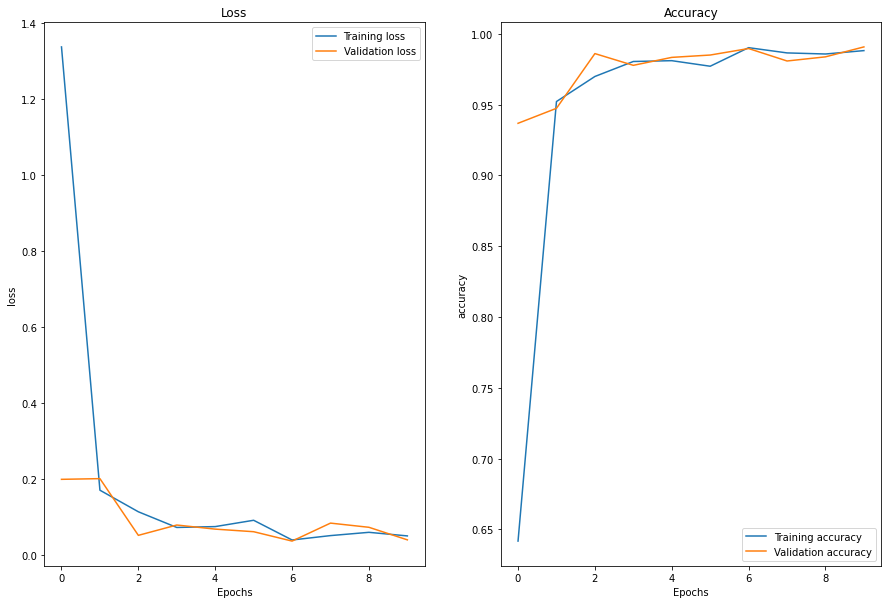

In [40]:
#Plotting the losses and accuracy

results=pd.DataFrame(history.history)
plt.figure(figsize=(15,10))
plt.subplot(121)
plt.plot(results["loss"],label="Training loss")
plt.plot(results["val_loss"],label="Validation loss")
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()

plt.subplot(122)
plt.plot(results["accuracy"],label="Training accuracy")
plt.plot(results["val_accuracy"],label="Validation accuracy")
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend()

plt.show()

In [41]:
model.evaluate(X_train,y_train)

981/981 [==============================] - 12s 13ms/step - loss: 0.0206 - accuracy: 0.9945


[0.020577322691679, 0.9944527745246887]

In [42]:
model.evaluate(X_valid,y_valid)

246/246 [==============================] - 3s 12ms/step - loss: 0.0399 - accuracy: 0.9907


[0.03994065895676613, 0.9906911253929138]

In [43]:
#Checking Accuracy on test set

test=pd.read_csv(os.path.join(os.curdir,"data","Test.csv"))
test.head()
y_test=test["ClassId"].values

y_preds=model.predict(X_test)
y_preds=np.argmax(y_preds, axis=-1)
accuracy=accuracy_score(y_test, y_preds)
print("Accuracy on the test set-------> ",accuracy)

Accuracy on the test set------->  0.9595407759303246


<AxesSubplot:>

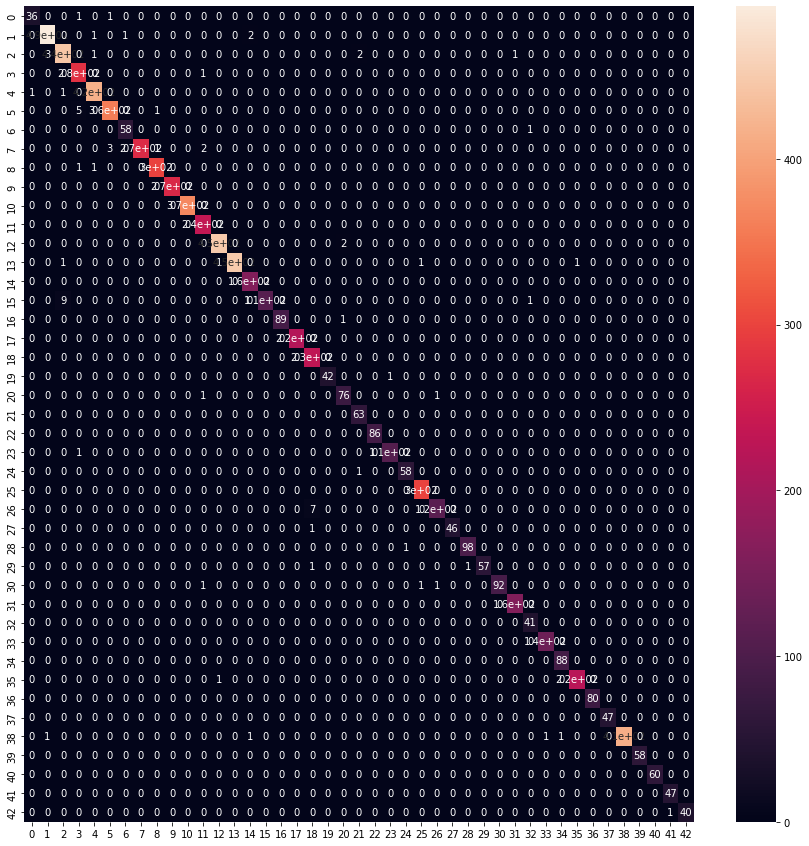

In [59]:
#Plotting confusion matrix

preds=model.predict(X_valid)
preds=np.argmax(preds, axis=-1)
matrix=confusion_matrix(y_valid,preds)
plt.figure(figsize=(15,15))
sns.heatmap(matrix,annot=True)


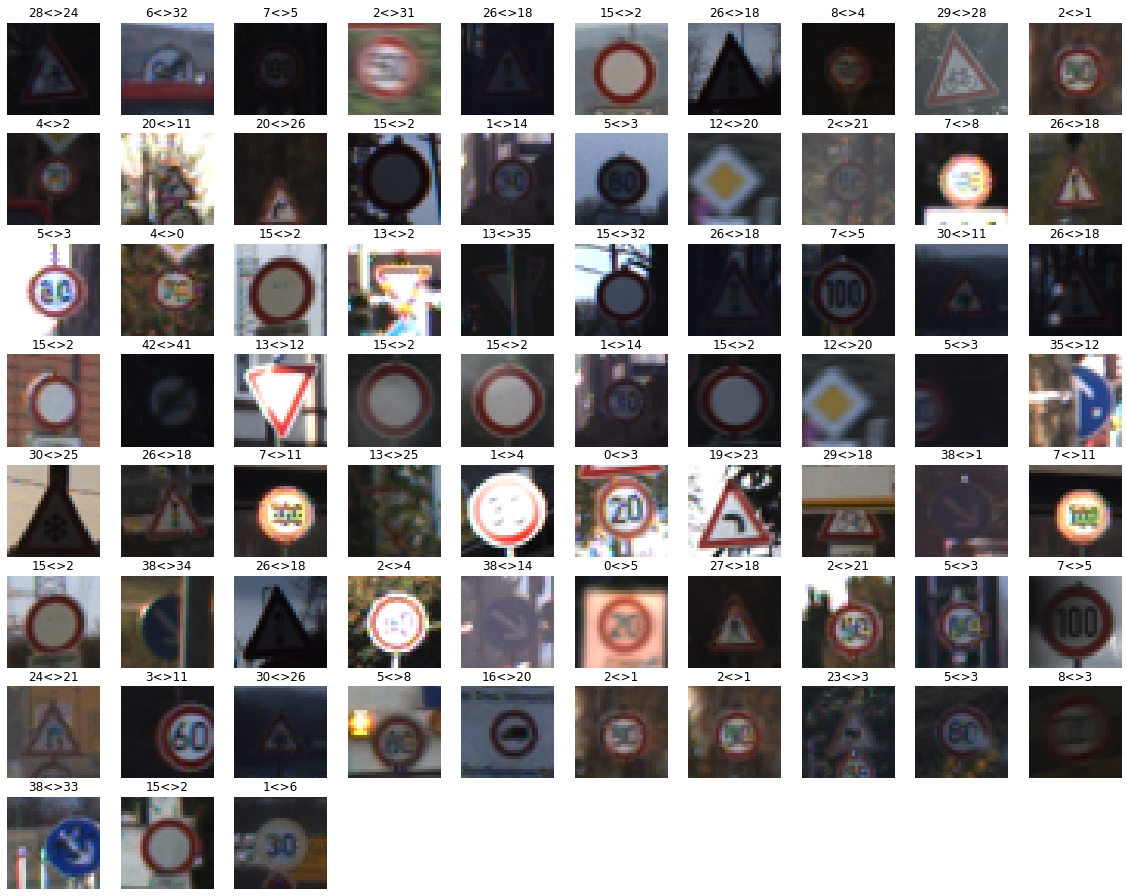

In [54]:
#Plotting the missclassified images(Correct<>Incorrect)

fig=plt.figure(figsize=(20,20))
indices=(y_valid!=preds)
misclassified_images=X_valid[indices]
correct_labels=y_valid[indices]
incorrect_labels=preds[indices]
plt.title("true<>pred")

for i in range(len(correct_labels)):
    plt.subplot(10,10,i+1)
    plt.imshow(misclassified_images[i])
    plt.title(f"{correct_labels[i]}<>{incorrect_labels[i]}")
    plt.axis("off")
    
plt.show()

In [60]:
#Saving the model weights to the disk
model.save_weights("Final_Model_weights.h5")

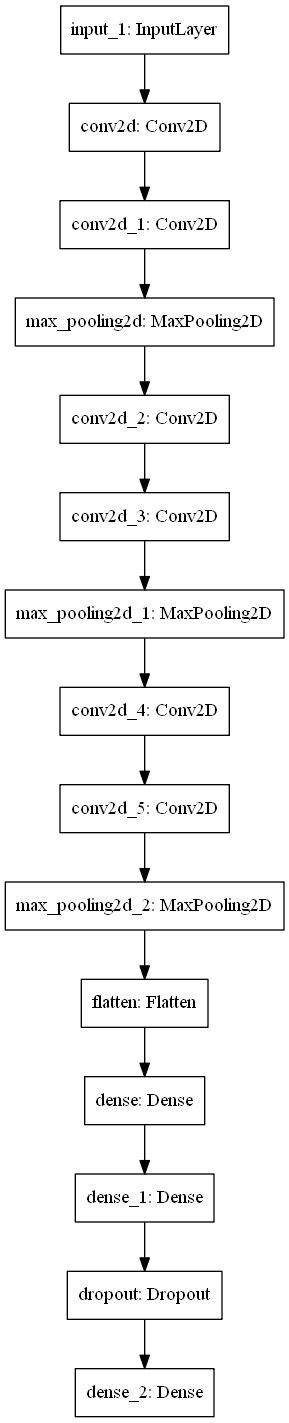

In [7]:
#Final model architecture
plot_model(model,to_file="Final_architecture.png",rankdir="TB")